In [1]:
import tensorflow.keras as tf 
import tensorflow as tf1 
import numpy as np 
import matplotlib.pyplot as plt  

In [2]:
# From the MNIST dataset, we are going to create a another output prediction column, whether it is written by left handed or right handed person
# so, using this dummy dataset, we can practice the multi-output prediction

In [11]:
(x_train, y_train), (x_test, y_test) = tf.datasets.mnist.load_data()

In [12]:
y_train1 = np.zeros(shape = len(y_train))
y_test1 = np.zeros(shape = len(y_test))

In [13]:
# y_train1 -----> 0--left-handed, 1-- right-handed

for idx, val in enumerate(y_train) :
# we are just saying that, if vimage is greateer than 4 then give a 1, which is right handed
  if val > 4 :
    y_train1[idx] = 1 

In [15]:
y_train1

array([1., 0., 0., ..., 1., 1., 1.])

In [ ]:
# y_train --- is for the digit classification(output1) that our model will classify and y_train1 ------ is for the left handed or right handed 
# which is created as dummy data

In [20]:
# model building 

input_layer = tf.layers.Input(
    shape = (28, 28)
)

hidden_layer1 = tf.layers.Conv1D(
    filters = 64,
    kernel_size = 5,
    activation = 'relu'
)(input_layer)


hidden_layer2 = tf.layers.Flatten()(hidden_layer1)

hidden_layer3 = tf.layers.Dense(
    units = 100,
    activation = 'relu'
)(hidden_layer2)

output1 = tf.layers.Dense(
    units = 10, 
    activation = 'softmax',
    name = 'digit_classification_output'
)(hidden_layer3)

output2 = tf.layers.Dense(
    units = 2, 
    activation = 'softmax',
    name = 'leftright'
)(hidden_layer3)


model = tf.Model(
    inputs = input_layer,
    outputs = [output1, output2]
)

# For the losses we need to specify a dictionary of loss for each of the outputs

loss1 = tf.losses.sparse_categorical_crossentropy
loss2 = tf.losses.sparse_categorical_crossentropy

# dict = {
  # 'outputlayer_name : lossfucntion associated with it   
#}
losses = {
    'digit_classification_output' : loss1,
    'leftright' : loss2
}

model.compile(
    loss = losses,
    optimizer = 'adam',
    metrics = 'accuracy'
)

In [21]:
# for the y labels also we need to create a dictionary like we created for the loss function 


y_labels = {
    'digit_classification_output' : y_train,
    'leftright' : y_train1
}

# fitting the model

history = model.fit(
    x_train, y_labels, epochs = 3
)

Epoch 1/3
1875/1875 [==============================] - 12s 6ms/step - loss: 1.3311 - digit_classification_output_loss: 0.9139 - leftright_loss: 0.4172 - digit_classification_output_accuracy: 0.8556 - leftright_accuracy: 0.9268
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2537 - digit_classification_output_loss: 0.1843 - leftright_loss: 0.0694 - digit_classification_output_accuracy: 0.9537 - leftright_accuracy: 0.9757
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1592 - digit_classification_output_loss: 0.1130 - leftright_loss: 0.0463 - digit_classification_output_accuracy: 0.9694 - leftright_accuracy: 0.9839


In [33]:
y_pred = model.predict(x_test)

# First index of the matrix is the output of different outputs
print(y_pred[0][0])
print(y_pred[1][0])     


[8.7253121e-13 3.2777584e-07 2.4644264e-06 1.8416925e-08 9.6346708e-10
 4.1164404e-16 1.2798318e-19 9.9999607e-01 4.4713490e-11 1.0622185e-06]
[1.7901404e-05 9.9998212e-01]


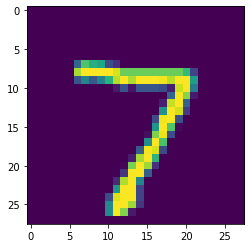

In [35]:
# so the answer is 7, and the prediction also gives 7 and it says as a right-handed which is also correct
plt.imshow(x_test[0])

In [ ]:
w